<a href="https://colab.research.google.com/github/Ds2023/Machine_Learning_Algoz_Implementation/blob/main/ridge_lasso_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Model to predict the sales given the spend on marketing
data = {'Marketing Spend( Million $)' : [23 , 26, 30 , 34 , 43 , 48],
        'Sales (Million $)': [651 , 762 , 856 ,1063 , 1190 , 1298]}
data = pd.DataFrame(data)
data

,Marketing Spend( Million $),Sales (Million $)
0,23,651
1,26,762
2,30,856
3,34,1063
4,43,1190
5,48,1298


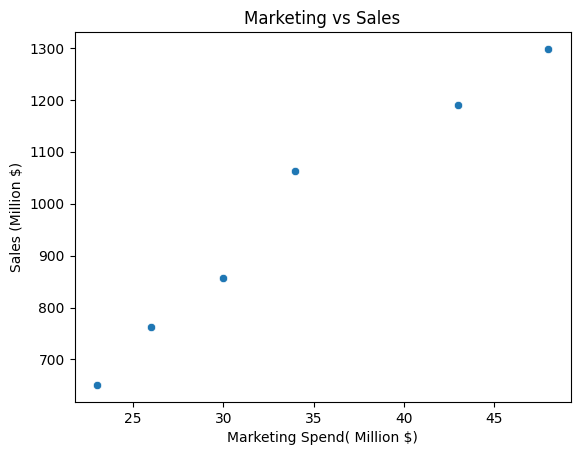

In [5]:
sns.scatterplot( data = data , x = 'Marketing Spend( Million $)' , y = 'Sales (Million $)')
plt.title("Marketing vs Sales")
plt.show()

**Perform some Feature Scaling**

In [9]:
scaler = MinMaxScaler()
data[['Marketing Spend( Million $)', 'Sales (Million $)']] = \
scaler.fit_transform(data[['Marketing Spend( Million $)', 'Sales (Million $)']])

In [10]:
data

,Marketing Spend( Million $),Sales (Million $)
0,0.00,0.000000
1,0.12,0.171561
2,0.28,0.316847
3,0.44,0.636785
4,0.80,0.833076
5,1.00,1.000000


**Fitting a linear regression model**

In [11]:
X = data['Marketing Spend( Million $)'].values.reshape(-1,1)
y = data['Sales (Million $)']

In [12]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [14]:
y_pred = lin_reg.predict(X)

In [15]:
mean_squared_error(y,y_pred)

0.004468051230292812

**Plotting our model**

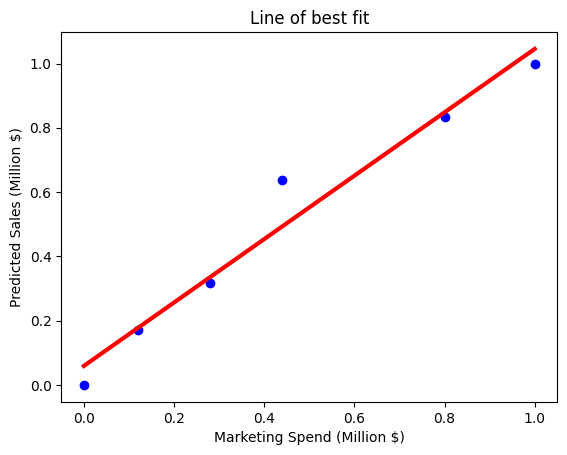

In [16]:
plt.scatter( X , y , color = 'blue') # original data shown as blue points
plt.plot(X , y_pred , color = 'red' , linewidth = 3) # Fitted model in red
plt.xlabel("Marketing Spend (Million $)")
plt.ylabel("Predicted Sales (Million $)")
plt.title("Line of best fit")
plt.show()

**Let's fit a polynomial model**

In [18]:
degree=5
polyreg5 = PolynomialFeatures(degree)
X_poly5 = polyreg5.fit_transform(X)
linreg5 = LinearRegression()
linreg5.fit(X_poly5, y)

LinearRegression()

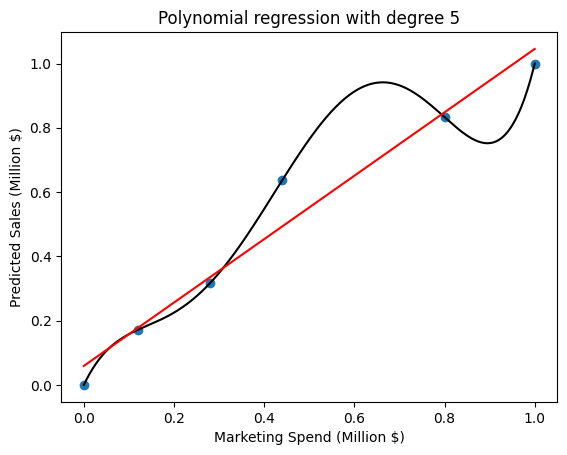

In [20]:
X_seq = np.linspace(X.min(),X.max(),300).reshape(-1,1) # Between 0 and 1 we get 300 equally spaced values
plt.figure()
plt.scatter(X,y)
plt.plot(X_seq,linreg5.predict(polyreg5.fit_transform(X_seq)),color="black") # model fit with polynomial regression
plt.plot(X_seq,lin_reg.predict(X_seq),color="red") # model fit with linear regression
plt.title("Polynomial regression with degree "+str(degree))
plt.xlabel("Marketing Spend (Million $)")
plt.ylabel("Predicted Sales (Million $)")
plt.show()

In [21]:
y_pred5 = linreg5.predict(polyreg5.fit_transform(X))

In [22]:
mean_squared_error(y, y_pred5)

2.167326003616732e-29

**Applying Regularization**

**Ridge Regularization**

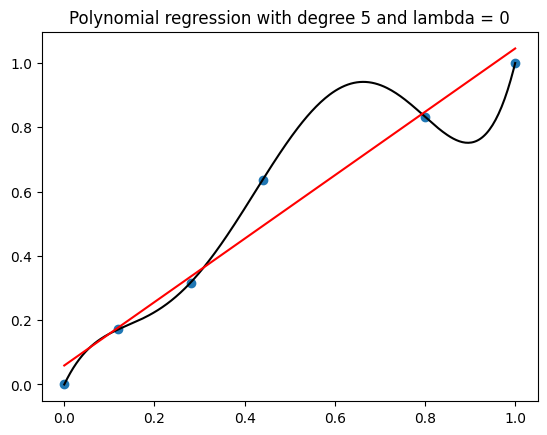

r2 score = 1.0
[  0.           2.94295226 -19.85351777  71.18543313 -95.27426562
  41.99939801]


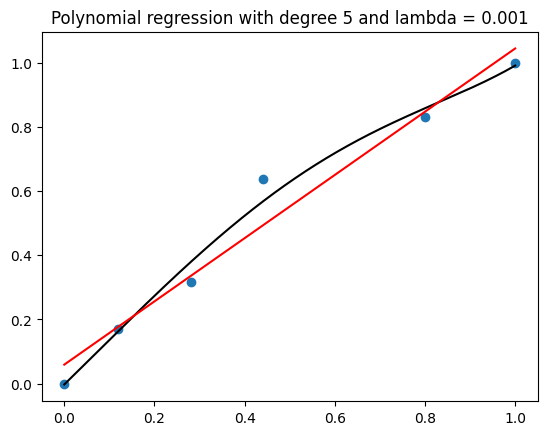

r2 score = 0.9877944050899677
[ 0.          1.3870223   0.12292763 -0.68649391 -0.38094524  0.55241207]


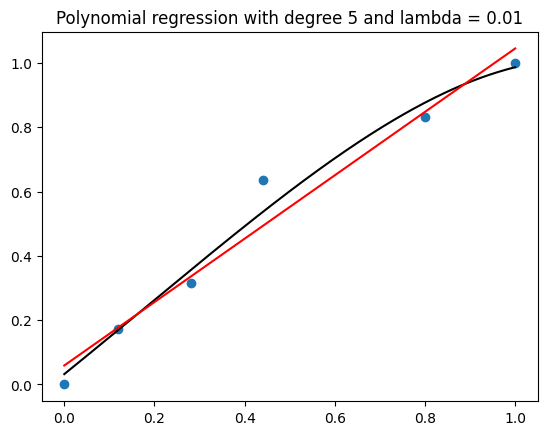

r2 score = 0.9809539612050427
[ 0.          1.13560973  0.13020587 -0.17959473 -0.14842149  0.01704645]


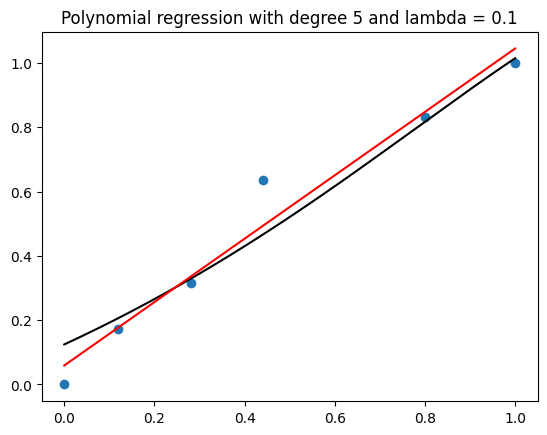

r2 score = 0.9396437428481395
[ 0.          0.65027964  0.2651751   0.07110798 -0.02396289 -0.07201942]


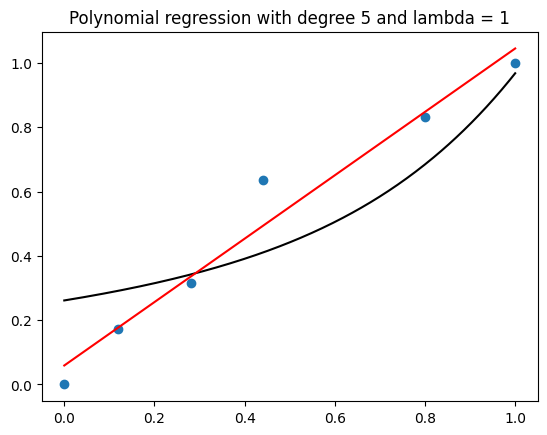

r2 score = 0.7953946450161846
[0.         0.22867197 0.16688081 0.12627838 0.10086186 0.08408679]


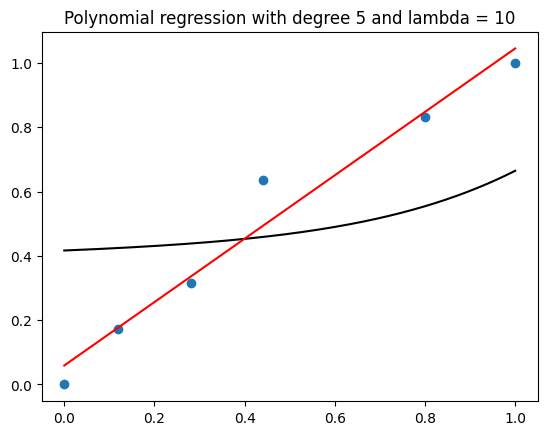

r2 score = 0.38495051893643784
[0.         0.0571764  0.05346191 0.0489761  0.04550657 0.04291024]


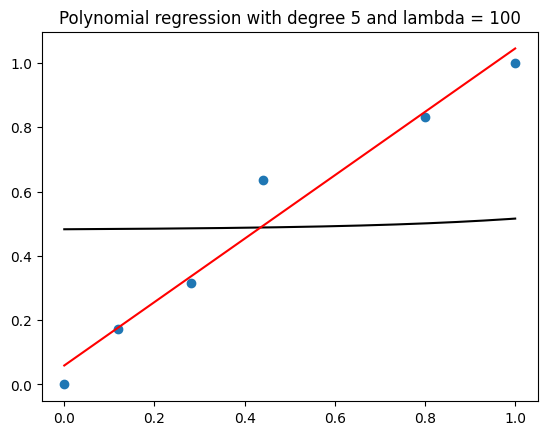

r2 score = 0.058590880289601466
[0.         0.00729918 0.00707285 0.00662207 0.00624288 0.00594789]


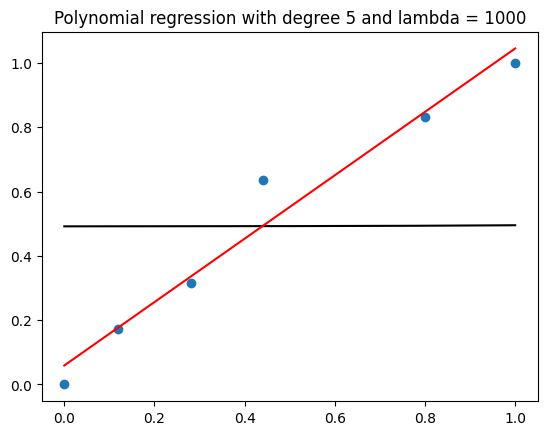

r2 score = 0.006166338591997
[0.         0.00075179 0.0007312  0.00068611 0.00064776 0.00061778]


In [24]:
X_seq = np.linspace(X.min(),X.max(),300).reshape(-1,1) # values to be considered for predictor variable
lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000] # Higher the value of lambda,
                                                  # more the regularization
for i in lambdas: # for each lambda we get different model coefficients
    degree = 5 # Degree for polynomial regression - chose 5 since this is the lowest number that gave a perfect fit
    # Creating degree 5 features
    ridgecoef = PolynomialFeatures(degree)
    # Transforming input features to polynomial features (1, x1, x2, x3, x4, x5)
    X_poly = ridgecoef.fit_transform(X)
    ridgereg = Ridge(alpha = i) # Initialize the Ridge Regression model with a specific lambda
    ridgereg.fit(X_poly, y) # fit the model on the polynomial features

    # Plotting the ridge regression model for each lambda
    plt.figure()
    plt.scatter(X,y)
    plt.plot(X_seq,ridgereg.predict(ridgecoef.fit_transform(X_seq)),color="black") # Polynomial Regression
    plt.plot(X_seq,lin_reg.predict(X_seq),color="red") # Linear Regression
    plt.title("Polynomial regression with degree "+str(degree) + " and lambda = " + str(i))
    plt.show()

    #Computing the r2 score
    y_pred = ridgereg.predict(ridgecoef.fit_transform(X))
    print("r2 score = " + str(r2_score(y, y_pred)))
    print(ridgereg.coef_) # model coefficients

**Lasso Regularization**

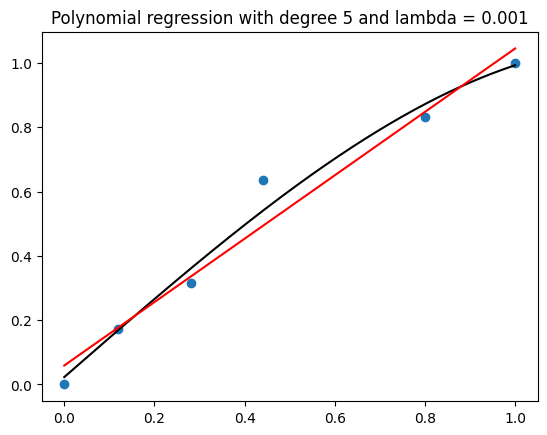

r2 score = 0.982660565919686
[ 0.          1.22414556 -0.         -0.25396979 -0.         -0.        ]


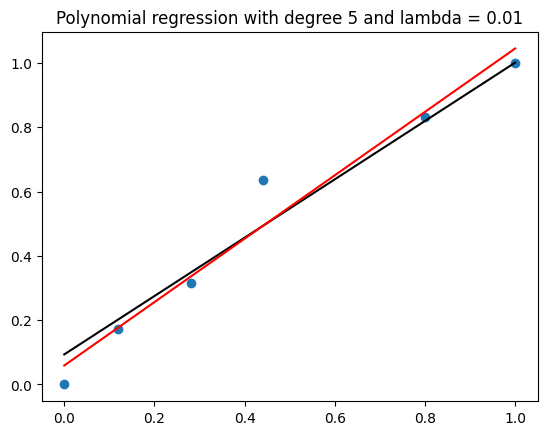

r2 score = 0.9591121182494984
[0.       0.907835 0.       0.       0.       0.      ]


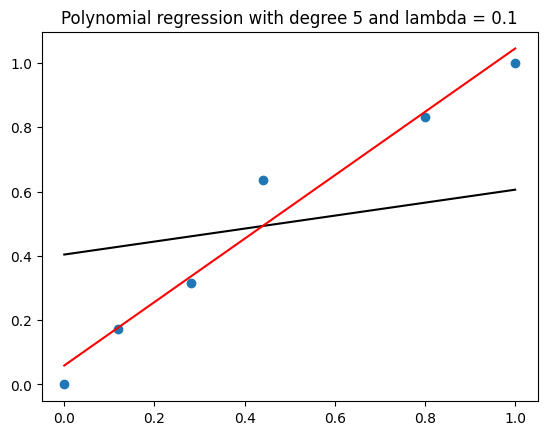

r2 score = 0.35452161107434443
[0.         0.20176806 0.         0.         0.         0.        ]


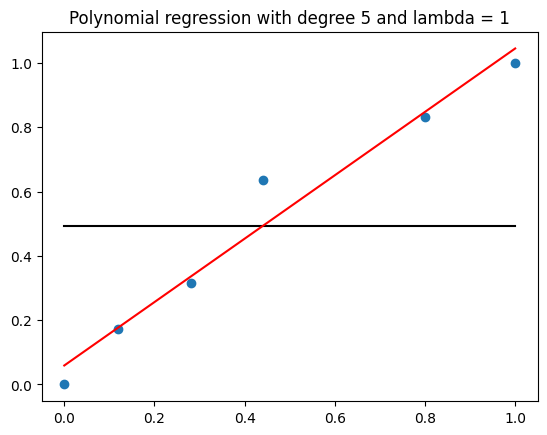

r2 score = 0.0
[0. 0. 0. 0. 0. 0.]


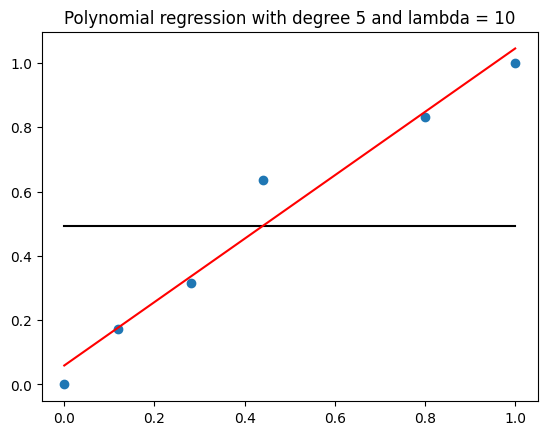

r2 score = 0.0
[0. 0. 0. 0. 0. 0.]


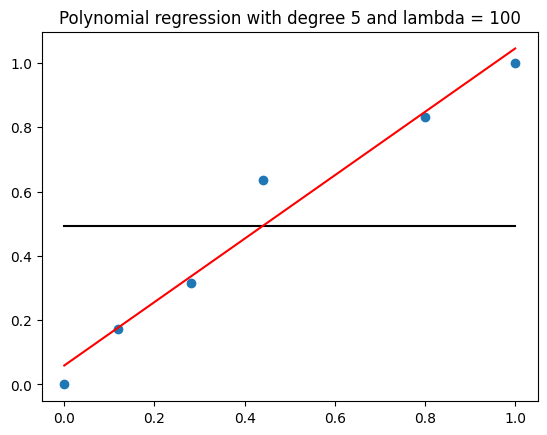

r2 score = 0.0
[0. 0. 0. 0. 0. 0.]


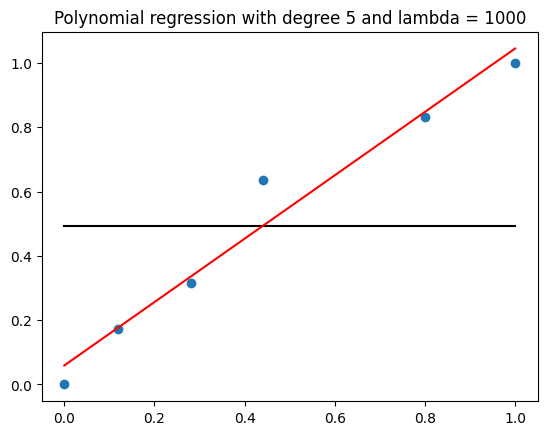

r2 score = 0.0
[0. 0. 0. 0. 0. 0.]


In [26]:
lambdas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for i in lambdas:
    degree = 5
    # Creating degree 5 features
    lassocoef = PolynomialFeatures(degree)
    # Transforming input features to polynomial features (1, x1, x2, x3, x4, x5)
    X_poly = lassocoef.fit_transform(X)
    lassoreg = Lasso(alpha = i)
    lassoreg.fit(X_poly, y)
    # Plotting the ridge model
    plt.figure()
    plt.scatter(X,y)
    plt.plot(X_seq,lassoreg.predict(lassocoef.fit_transform(X_seq)),color="black")
    plt.plot(X_seq,lin_reg.predict(X_seq),color="red")
    plt.title("Polynomial regression with degree "+str(degree) + " and lambda = " + str(i))
    plt.show()
    # Compute R^2
    y_pred = lassoreg.predict(lassocoef.fit_transform(X))
    print("r2 score = " + str(r2_score(y, y_pred)))
    print(lassoreg.coef_)